# KFold Cross validation and StratifiedKFold validation

In [1]:
import numpy as np
# load digit dataset
from sklearn.datasets import load_digits
# load 3 algos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
digit = load_digits()
type(digit)

sklearn.utils.Bunch

In [3]:
print(dir(digit))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


# Lets explore the data

In [4]:
digit.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
# lets check target
np.unique(digit.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
#lets check image data
digit.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [7]:
digit.target[1]

1

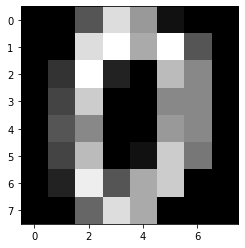

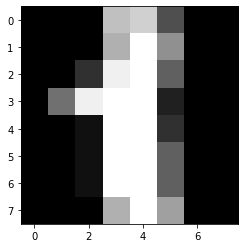

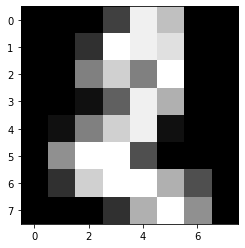

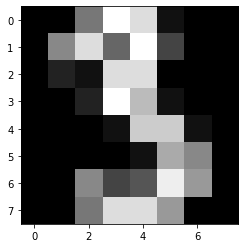

In [8]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.imshow(digit.images[i])
    plt.show()

In [9]:
print(digit.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [10]:
print(digit.data[0])
# this ur X

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [11]:
print(digit.target[0])
# this ur y

0


# train_test_split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(digit.data,digit.target,test_size=0.3)

### Logistic Regression

In [14]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
lr.score(X_train,y_train)*100

99.60222752585521

In [15]:
lr.score(X_test,y_test)*100

94.81481481481482

## Support vector Machine

In [16]:
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_train,y_train)*100

99.76133651551312

## RandomForest Classifier

In [17]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)*100

100.0

# K fold

In [18]:
#Provides train/test indices to split data in train/test sets.
from sklearn.model_selection import KFold

In [19]:
#default 5 folds we have
kf = KFold(n_splits=2)

In [20]:
kf

KFold(n_splits=2, random_state=None, shuffle=False)

In [21]:
len([8,12,22,36,4,85,68,97,8,9])

10

In [22]:
list(kf.split([8,12,22,36,4,85,68,97,8,9]))

[(array([5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4])),
 (array([0, 1, 2, 3, 4]), array([5, 6, 7, 8, 9]))]

In [23]:
for indices in kf.split([8,12,22,36,4,85,68,97,8,9]):
    print(indices)

(array([5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4]))
(array([0, 1, 2, 3, 4]), array([5, 6, 7, 8, 9]))


In [24]:
for train_index,test_index in kf.split([8,12,22,36,4,85,68,97,8,9]):
    print('Train index:',train_index,'Test index:',test_index)

Train index: [5 6 7 8 9] Test index: [0 1 2 3 4]
Train index: [0 1 2 3 4] Test index: [5 6 7 8 9]


In [25]:
kf2 = KFold()
# default 5 folds
kf2

KFold(n_splits=5, random_state=None, shuffle=False)

In [26]:
for indices in kf2.split([8,12,22,36,4,85,68,97,8,9]):
    print(indices)

(array([2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1]))
(array([0, 1, 4, 5, 6, 7, 8, 9]), array([2, 3]))
(array([0, 1, 2, 3, 6, 7, 8, 9]), array([4, 5]))
(array([0, 1, 2, 3, 4, 5, 8, 9]), array([6, 7]))
(array([0, 1, 2, 3, 4, 5, 6, 7]), array([8, 9]))


In [27]:
import numpy as np
a = np.array([8,12,22,36,4,85,68,97,8,9])
for train_index,test_index in kf2.split([8,12,22,36,4,85,68,97,8,9]):
    print(a[train_index],a[test_index])

[22 36  4 85 68 97  8  9] [ 8 12]
[ 8 12  4 85 68 97  8  9] [22 36]
[ 8 12 22 36 68 97  8  9] [ 4 85]
[ 8 12 22 36  4 85  8  9] [68 97]
[ 8 12 22 36  4 85 68 97] [8 9]


In [28]:
# how the data in the test is decided????
# total_no_elements / folds
len(a)/5

2.0

## If we want combined result then lets Create a model function

In [29]:
def get_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)#training
    return model.score(X_test,y_test)*100

In [30]:
#calculate testing data accuracy for random forest
get_model(rf,X_train,X_test,y_train,y_test)

97.4074074074074

In [31]:
#calculate Testing accuracy for SVM
get_model(svm,X_train,X_test,y_train,y_test)

98.70370370370371

In [32]:
print('Testing data accuracy for Logistic reg:',get_model(lr,X_train,X_test,y_train,y_test))
print('Testing data accuracy for SVM:',get_model(svm,X_train,X_test,y_train,y_test))
print('Testing data accuracy for Random Forest:',get_model(rf,X_train,X_test,y_train,y_test))

Testing data accuracy for Logistic reg: 94.81481481481482
Testing data accuracy for SVM: 98.70370370370371
Testing data accuracy for Random Forest: 97.22222222222221


In [33]:
mdl = [lr,svm,rf]
for i in mdl:
    print(i,get_model(i,X_train,X_test,y_train,y_test))

LogisticRegression(solver='liblinear') 94.81481481481482
SVC() 98.70370370370371
RandomForestClassifier() 97.4074074074074


### Now apply the same method using StratifiedKFold

In [34]:
from sklearn.model_selection import StratifiedKFold

In [41]:
kf.split(X)

<generator object _BaseKFold.split at 0x00000245F9081430>

In [42]:
StratifiedKFold()

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [43]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])

In [44]:
skf = StratifiedKFold(n_splits=2)

In [45]:
skf.split(X ,y)

<generator object _BaseKFold.split at 0x00000245F9081970>

In [46]:
#Generate indices to split data into training and test set.
list(skf.split(X,y))

[(array([1, 3]), array([0, 2])), (array([0, 2]), array([1, 3]))]

In [47]:
#lets apply kfold
list(kf.split(X))

[(array([2, 3]), array([0, 1])), (array([0, 1]), array([2, 3]))]

In [48]:
list(skf.split([8,12,22,36,4,85,68,97,8,9],[0,0,0,1,1,1,1,1,1,1]))

[(array([2, 6, 7, 8, 9]), array([0, 1, 3, 4, 5])),
 (array([0, 1, 3, 4, 5]), array([2, 6, 7, 8, 9]))]

In [49]:
for train_index,test_index in skf.split(X,y): #stratified
    print('train_index:',train_index,'test index:',test_index)
X_train, X_test = X[train_index], X[test_index]

train_index: [1 3] test index: [0 2]
train_index: [0 2] test index: [1 3]


In [50]:
for train_index,test_index in kf.split(X,y): #kfold
    print('train_index:',train_index,'test index:',test_index)
X_train, X_test = X[train_index], X[test_index]

train_index: [2 3] test index: [0 1]
train_index: [0 1] test index: [2 3]


## Use all above things in to one block

In [51]:
kf

KFold(n_splits=2, random_state=None, shuffle=False)

In [52]:
for train_index,test_index in kf.split(digit.data):
    print(train_index,test_index)

[ 899  900  901  902  903  904  905  906  907  908  909  910  911  912
  913  914  915  916  917  918  919  920  921  922  923  924  925  926
  927  928  929  930  931  932  933  934  935  936  937  938  939  940
  941  942  943  944  945  946  947  948  949  950  951  952  953  954
  955  956  957  958  959  960  961  962  963  964  965  966  967  968
  969  970  971  972  973  974  975  976  977  978  979  980  981  982
  983  984  985  986  987  988  989  990  991  992  993  994  995  996
  997  998  999 1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010
 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024
 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038
 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052
 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066
 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080
 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094
 1095 

In [53]:
kf

KFold(n_splits=2, random_state=None, shuffle=False)

In [54]:
scoreof_Logistic=[]
scoreof_SVM=[]
scoreof_rf=[]

for train_index,test_index in kf.split(digit.data):#its KFold
    X_train,X_test,y_train,y_test= digit.data[train_index],digit.data[test_index],digit.target[train_index],digit.target[test_index]
    
    scoreof_Logistic.append(get_model(LogisticRegression(solver='liblinear',multi_class='ovr'),X_train,X_test,y_train,y_test))
    scoreof_SVM.append(get_model(SVC(kernel='linear'),X_train,X_test,y_train,y_test))
    scoreof_rf.append(get_model(RandomForestClassifier(n_estimators=100),X_train,X_test,y_train,y_test))

In [55]:
scoreof_Logistic

[88.54282536151278, 91.64810690423162]

In [56]:
#average accuracy of Logisric regression
sum(scoreof_Logistic)/2

90.0954661328722

In [57]:
import numpy as np
np.mean(scoreof_Logistic)

90.0954661328722

In [58]:
scoreof_SVM

[92.99221357063404, 94.43207126948775]

In [59]:
scoreof_rf

[92.1023359288098, 92.87305122494432]

## Apply stratified kfold

In [60]:
skf

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)

In [61]:
scoreof_Logistic=[]
scoreof_SVM=[]
scoreof_rf=[]

for train_index,test_index in skf.split(digit.data,digit.target):#its StratifiedKFold
    X_train,X_test,y_train,y_test= digit.data[train_index],digit.data[test_index],digit.target[train_index],digit.target[test_index]
    
    scoreof_Logistic.append(get_model(LogisticRegression(solver='liblinear',multi_class='ovr'),X_train,X_test,y_train,y_test))
    scoreof_SVM.append(get_model(SVC(kernel='linear'),X_train,X_test,y_train,y_test))
    scoreof_rf.append(get_model(RandomForestClassifier(n_estimators=100),X_train,X_test,y_train,y_test))

In [62]:
scoreof_Logistic

[88.76529477196885, 91.87082405345211]

In [63]:
scoreof_rf

[92.54727474972191, 92.53897550111358]

In [64]:
scoreof_SVM

[93.32591768631812, 94.76614699331849]

## Magic of ML starts from here :

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
#it splits data into 5 folds by default
cross_val_score(lr,digit.data,digit.target)*100

array([92.22222222, 88.33333333, 95.26462396, 95.82172702, 89.41504178])

In [67]:
cross_val_score(lr,digit.data,digit.target,cv=4)*100

array([93.77777778, 91.09131403, 95.76837416, 90.42316258])

In [68]:
cross_val_score(svm,digit.data,digit.target,cv=3)*100

array([96.49415693, 97.9966611 , 96.49415693])

In [69]:
cross_val_score(rf,digit.data,digit.target)*100

array([93.33333333, 90.55555556, 95.82172702, 97.21448468, 92.2005571 ])

In [70]:
(cross_val_score(rf,digit.data,digit.target,cv=5)*100).mean()

93.88068709377902

In [71]:
digit.data.shape

(1797, 64)